### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost
from collections import Counter
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
data=pd.read_csv(r"C:\Users\konat\Downloads\traffic volume.csv")

### Analysing the data

In [3]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [4]:
data.shape

(48204, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [6]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


### Checking the null values

In [7]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [8]:
data.dtypes

holiday            object
temp              float64
rain              float64
snow              float64
weather            object
date               object
Time               object
traffic_volume      int64
dtype: object

### Handling the missing values

In [9]:
data.fillna({'temp': data['temp'].mean(), 
             'rain': data['rain'].mean(), 
             'snow': data['snow'].mean()}, inplace=True)



In [10]:

print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [11]:
data['weather'] = data['weather'].fillna('clouds')


In [12]:
data[["day", "month", "year"]] = data["date"].str.split("-", expand = True)


In [13]:
data[["hours", "minutes", "seconds"]] = data["Time"].str.split(":", expand = True)

In [14]:
data.isnull().sum()

holiday           48143
temp                  0
rain                  0
snow                  0
weather               0
date                  0
Time                  0
traffic_volume        0
day                   0
month                 0
year                  0
hours                 0
minutes               0
seconds               0
dtype: int64

In [15]:
data['holiday'] = data['holiday'].fillna(0)


In [16]:
print(data.isnull().sum())


holiday           0
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
day               0
month             0
year              0
hours             0
minutes           0
seconds           0
dtype: int64


### Encoding the data


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['weather'] = le.fit_transform(data['weather'])

In [18]:
print(data.dtypes)


holiday            object
temp              float64
rain              float64
snow              float64
weather             int32
date               object
Time               object
traffic_volume      int64
day                object
month              object
year               object
hours              object
minutes            object
seconds            object
dtype: object


In [19]:
cor = data.select_dtypes(include='number').corr()
print(cor)

                    temp      rain      snow   weather  traffic_volume
temp            1.000000  0.009070 -0.019758 -0.032292        0.130034
rain            0.009070  1.000000 -0.000090  0.009473        0.004714
snow           -0.019758 -0.000090  1.000000  0.036400        0.000735
weather        -0.032292  0.009473  0.036400  1.000000       -0.039910
traffic_volume  0.130034  0.004714  0.000735 -0.039910        1.000000


In [20]:
# Convert to datetime if not already
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Extract parts
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day


### Data visualization

<Axes: >

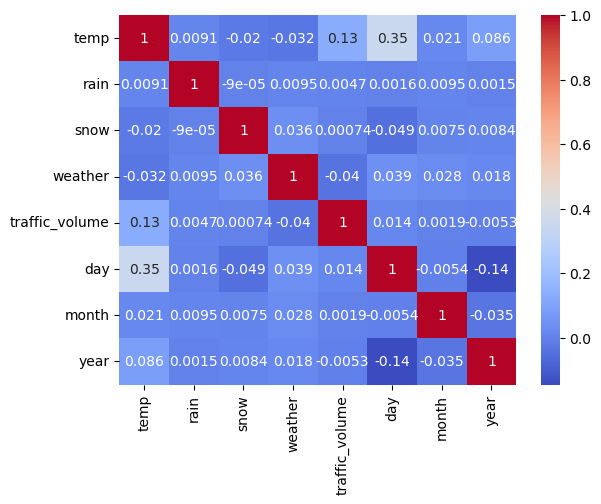

In [21]:
cor=data.select_dtypes(include='number').corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')

<Axes: >

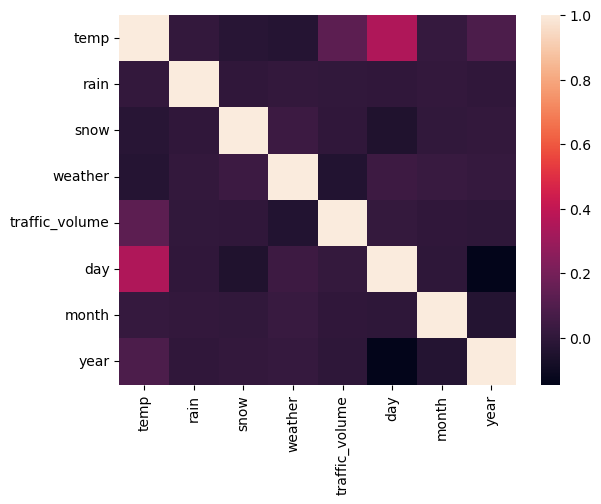

In [22]:
sns.heatmap(cor)


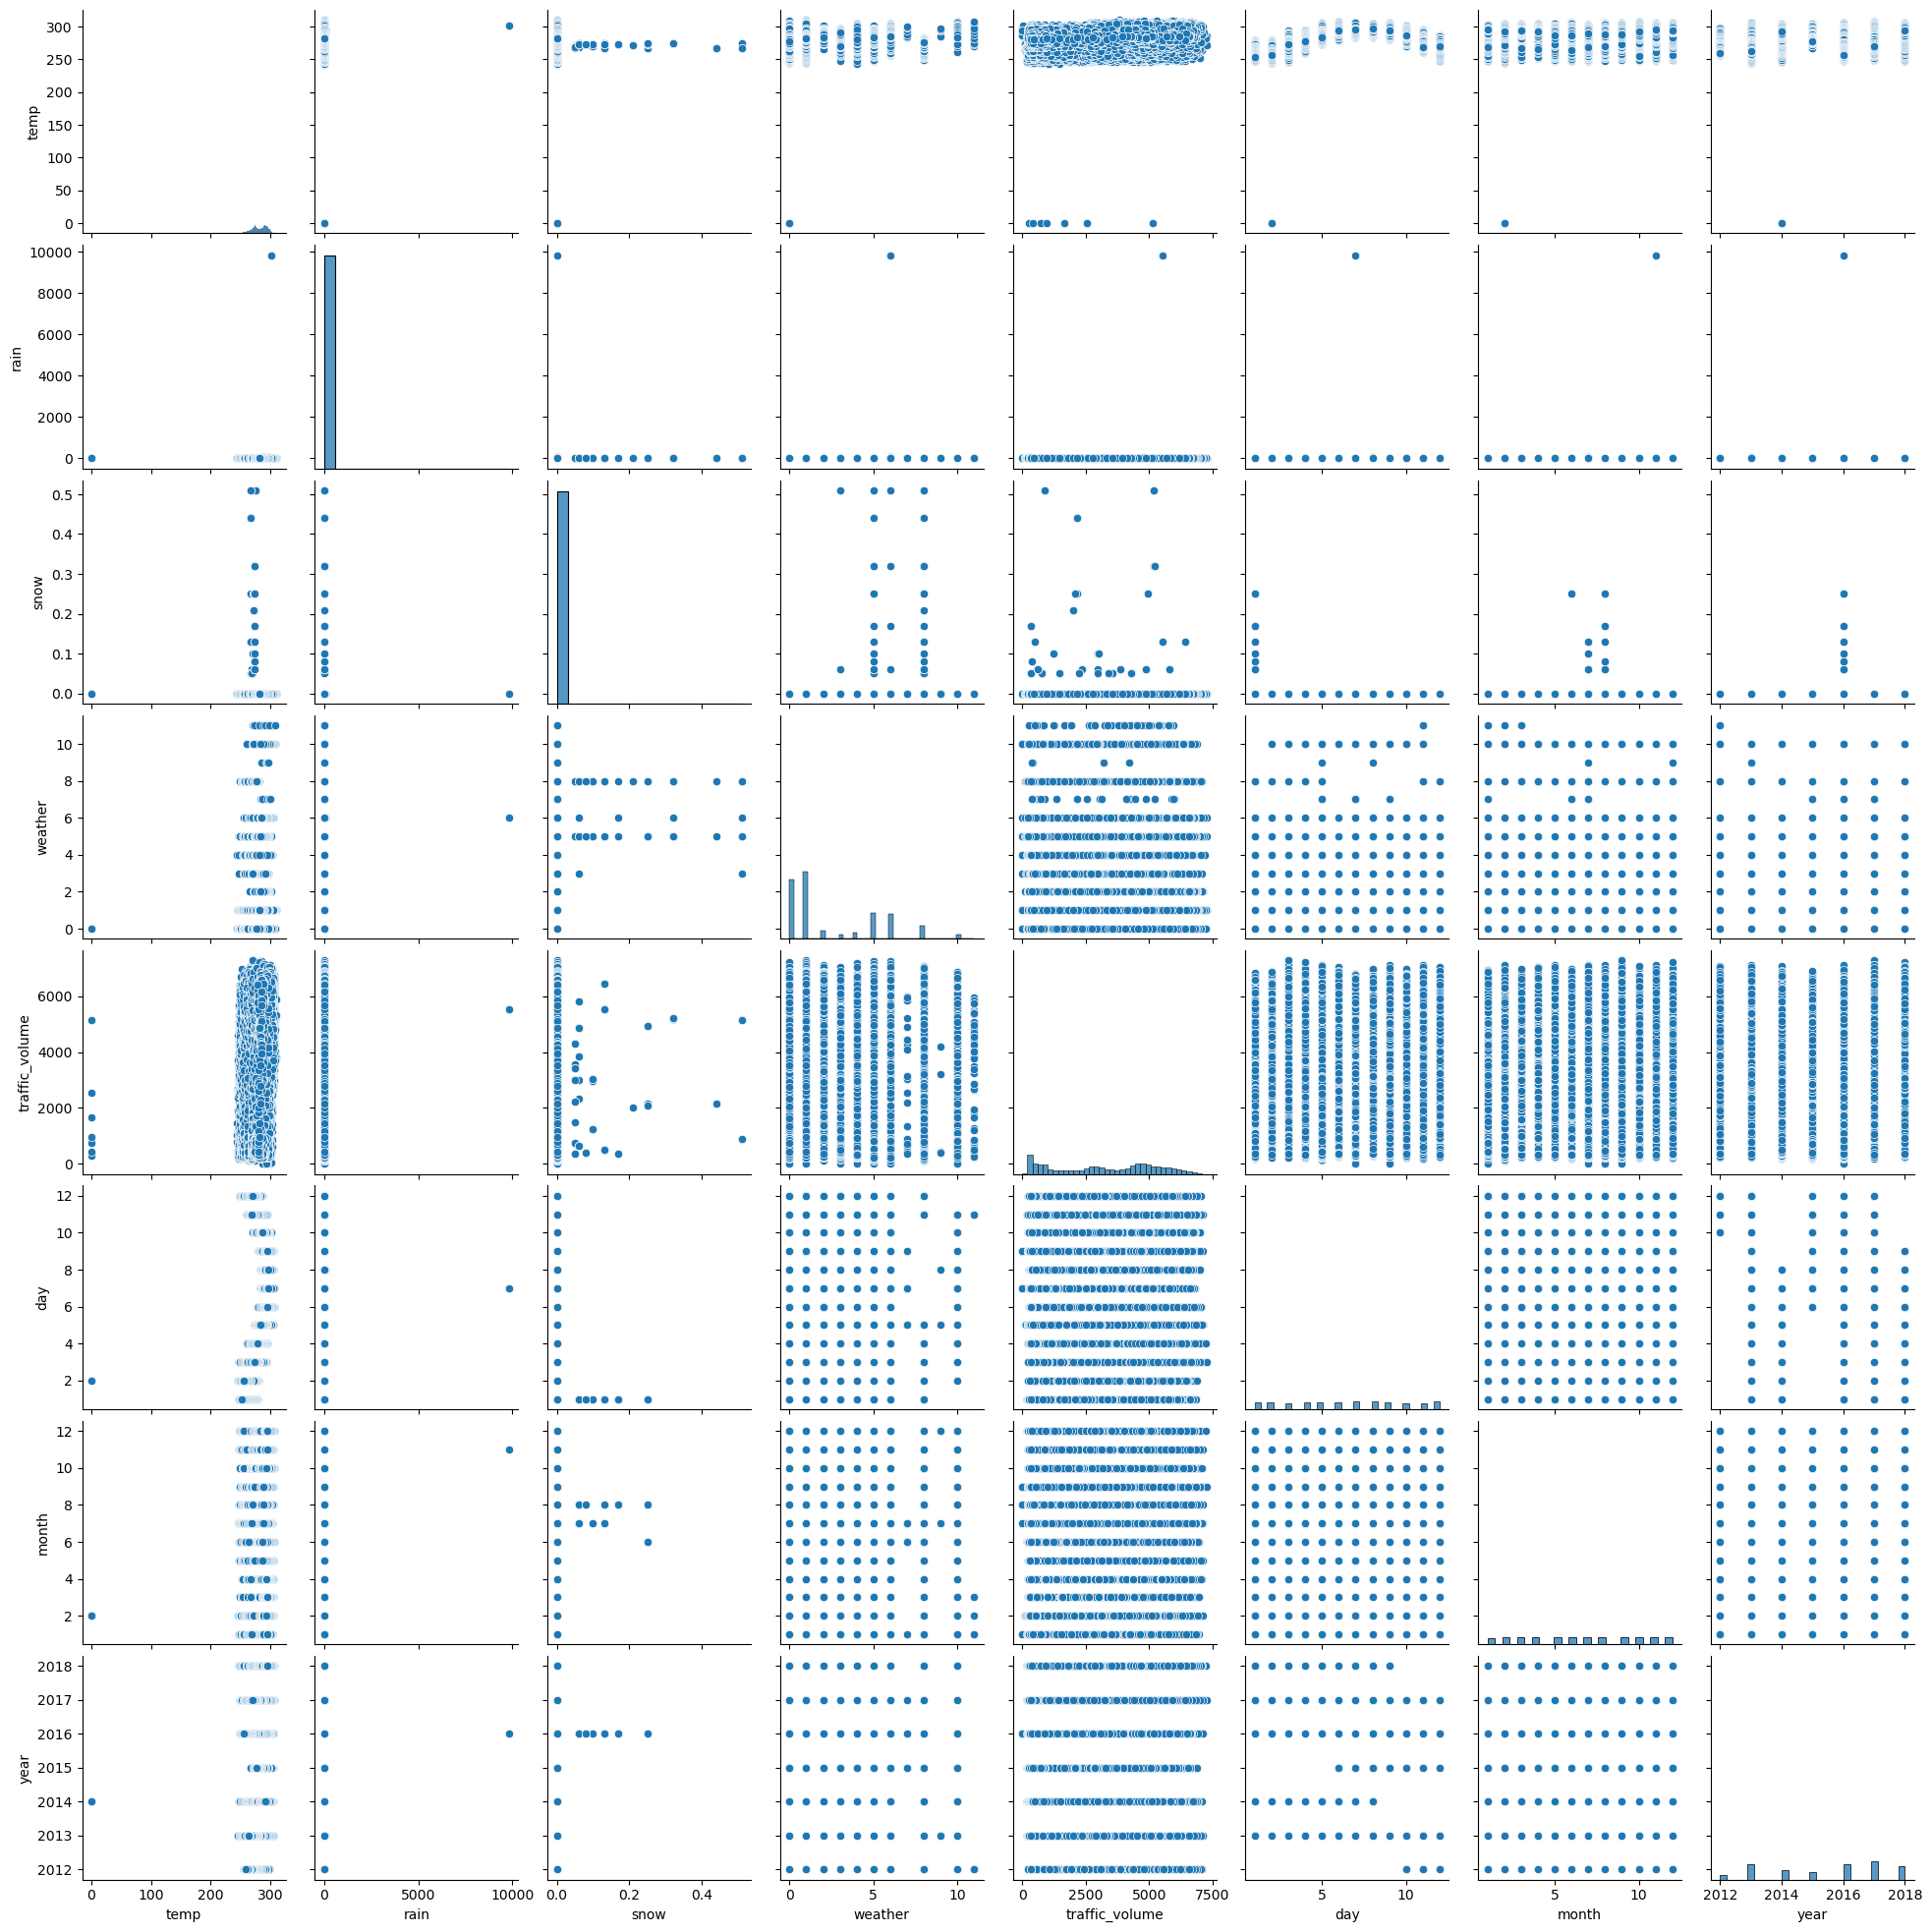

In [23]:
sns.pairplot(data)

<Axes: >

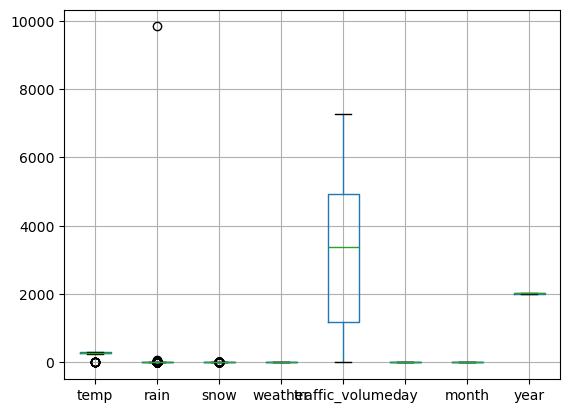

In [24]:
data.boxplot()

### Splitting date and time

In [25]:
data.drop(columns=["date","Time"],axis=1,inplace=True)

In [26]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,0,288.28,0.0,0.0,1,5545,10.0,2.0,2012.0,09,00,00
1,0,289.36,0.0,0.0,1,4516,10.0,2.0,2012.0,10,00,00
2,0,289.58,0.0,0.0,1,4767,10.0,2.0,2012.0,11,00,00
3,0,290.13,0.0,0.0,1,5026,10.0,2.0,2012.0,12,00,00
4,0,291.14,0.0,0.0,1,4918,10.0,2.0,2012.0,13,00,00


### Splitting the dataset into dependent and independent variable

In [27]:
y= data['traffic_volume']
x= data.drop(columns=['traffic_volume'], axis=1)

In [28]:

x.shape
y.shape


(48204,)

In [29]:
names= x.columns


### Feature scaling

In [30]:
from sklearn.preprocessing import scale


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convert all values to strings
data['holiday'] = data['holiday'].astype(str)

# Apply label encoding
data['holiday'] = le.fit_transform(data['holiday'])


In [32]:
data['holiday']=le.fit_transform(data['holiday'])

In [33]:
from sklearn.preprocessing import scale

# Optional: Convert 'holiday' to numeric
x['holiday'] = x['holiday'].apply(lambda val: 0 if val == 'None' else 1)

# Keep only numeric data
x_numeric = x.select_dtypes(include='number')

# Apply scaling
x_scaled = scale(x_numeric)


In [34]:
x = scale(x)


In [35]:
x=pd.DataFrame(x,columns=names)

In [36]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.0,0.530485,-0.007463,-0.027235,-0.567564,1.035245,-1.332998,-1.834817,-0.345548,0.0,0.0
1,0.0,0.611467,-0.007463,-0.027235,-0.567564,1.035245,-1.332998,-1.834817,-0.201459,0.0,0.0
2,0.0,0.627964,-0.007463,-0.027235,-0.567564,1.035245,-1.332998,-1.834817,-0.057371,0.0,0.0
3,0.0,0.669205,-0.007463,-0.027235,-0.567564,1.035245,-1.332998,-1.834817,0.086718,0.0,0.0
4,0.0,0.744939,-0.007463,-0.027235,-0.567564,1.035245,-1.332998,-1.834817,0.230807,0.0,0.0


### Splitting the data into train and test

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Training and testing the model

### Intializing the model

In [39]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

### Fitting the models with x_train and y_train

In [40]:
lin_reg=linear_model. LinearRegression()
Dtree= tree. DecisionTreeRegressor()
Rand =ensemble. RandomForestRegressor()
svr =svm.SVR()
XGB =xgboost.XGBRegressor()

In [41]:
 #Fill missing values
x_train = x_train.fillna(x_train.mean())
y_train = y_train.fillna(y_train.mean())

# Now fit the model
lin_reg.fit(x_train, y_train)


LinearRegression()

In [42]:
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
p1= lin_reg.predict(x_train)
p2 =Dtree.predict(x_train)
p3 =Rand.predict(x_train)
p4 =svr.predict(x_train)
p5 =XGB.predict(x_train)

### Regression evaluation metrics

In [44]:
from sklearn import metrics

### R-squared_score

In [45]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.5454341695561205
0.9958690150975323
0.9637443399084646
-4.600915527725077
0.8096237778663635


In [46]:
# Ensure no NaNs in training data
x_train = x_train.fillna(x_train.mean())
y_train = y_train.fillna(y_train.mean())

# Train model
lin_reg.fit(x_train, y_train)

# Ensure no NaNs in test data
x_test = x_test.fillna(x_test.mean())

# Predict
p1 = lin_reg.predict(x_test)


In [47]:
p1= lin_reg.predict(x_test)
p2 =Dtree.predict(x_test)
p3 =Rand.predict(x_test)
p4 =svr.predict(x_test)
p5 =XGB.predict(x_test)

In [48]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-5.429627784496344
0.657246005727749
0.7518803569243664
-4.589459210431281
0.7792501449584961


### RMSE - Root Mean Square Error

In [49]:
MSE=metrics.mean_squared_error(p3,y_test)

In [50]:
np.sqrt(MSE)

903.9943226971268

### Saving the model

In [51]:
import pickle

In [52]:
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))